In [50]:
# Import necessary libraries for data analysis, visualization, and install the fredapi package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


In [51]:
# Import Fred from fredapi
from fredapi import Fred

# Import Fred API Key


In [52]:
fred_key = ('1c1f54581ea0001cf7fb832af9e3dd6e')

# Create Fred Object

In [53]:
fred = Fred(api_key=fred_key)

# Search For S&P 500 Data

In [54]:
# Search the FRED database for data series related to the S&P index, sorted by popularity
sp_search = fred.search("S&P", order_by='popularity')

In [67]:
# Inspect the results
sp_search.head(5)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-07-31,2023-07-31,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-07-28,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-07-31 08:25:05-05:00,93,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-07-31,2023-07-31,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-05-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-07-25 08:11:01-05:00,91,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-07-31,2023-07-31,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-07-28,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-07-31 08:25:10-05:00,83,This data represents the effective yield of th...
SP500,SP500,2023-07-31,2023-07-31,S&P 500,2013-08-01,2023-07-31,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-07-31 19:10:55-05:00,82,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2023-07-31,2023-07-31,Real Median Household Income in the United States,1984-01-01,2021-01-01,Annual,A,2021 CPI-U-RS Adjusted Dollars,2021 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2022-09-13 13:48:01-05:00,80,Household data are collected as of March. As ...


# Pull Raw Data

In [56]:
# Retrieve data for the S&P 500 index from the FRED database
sp500 = fred.get_series(series_id='SP500')

<Axes: title={'center': 'S&P 500'}>

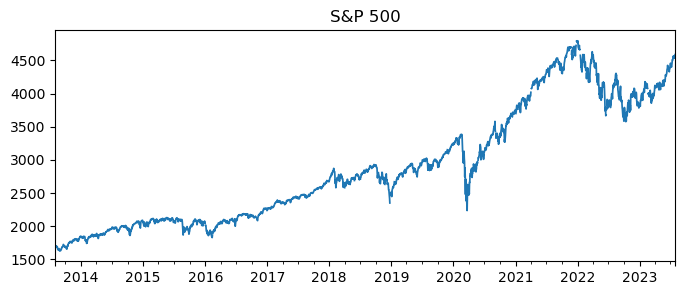

In [57]:
# Create a line plot of the S&P 500 data with specified size, title, and line width
sp500.plot(figsize=(8,3), title='S&P 500', lw=1.25)

# Pull And Join Multiple Data Series

In [58]:
# Search the FRED database for data series related to unemployment
uemp_results = fred.search('unemployment rate state')
uemp_results.head(5)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-07-31,2023-07-31,Unemployment Rate,1948-01-01,2023-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-07-07 07:45:02-05:00,93,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-07-31,2023-07-31,Unemployment Rate,1948-01-01,2023-06-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-07-07 07:45:14-05:00,53,The unemployment rate represents the number of...
CCSA,CCSA,2023-07-31,2023-07-31,Continued Claims (Insured Unemployment),1967-01-07,2023-07-15,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2023-07-27 07:33:07-05:00,75,"Continued claims, also referred to as insured ..."
LNS14000006,LNS14000006,2023-07-31,2023-07-31,Unemployment Rate - Black or African American,1972-01-01,2023-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-07-07 07:45:08-05:00,67,The series comes from the 'Current Population ...
UNEMPLOY,UNEMPLOY,2023-07-31,2023-07-31,Unemployment Level,1948-01-01,2023-06-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-07-07 07:45:05-05:00,65,The series comes from the 'Current Population ...


In [59]:
# Retrieve data for the unemployment rate using get_series function
unrate = fred.get_series('UNRATE')

In [60]:
# Filter the search down to monthly frequency
uemp_df= fred.search('unemployment rate by state',filter=('frequency','Monthly'))

# Filter again to include only seasonally adjusted data in % units
uemp_df= uemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units=="Percent"')

# Further filter the search results to only include data series with titles containing 'Unemployment Rate in'
# To get data for all the states.
uemp_df=uemp_df.loc[uemp_df['title'].str.contains('Unemployment Rate in')]

In [61]:
# Data with all the states
uemp_df.head(5)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CAUR,CAUR,2023-07-31,2023-07-31,Unemployment Rate in California,1976-01-01,2023-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-07-26 14:43:01-05:00,57,None
TXUR,TXUR,2023-07-31,2023-07-31,Unemployment Rate in Texas,1976-01-01,2023-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-07-26 14:42:02-05:00,50,None
FLUR,FLUR,2023-07-31,2023-07-31,Unemployment Rate in Florida,1976-01-01,2023-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-07-26 14:42:02-05:00,47,None
NYUR,NYUR,2023-07-31,2023-07-31,Unemployment Rate in New York,1976-01-01,2023-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-07-26 14:42:03-05:00,46,None
MAUR,MAUR,2023-07-31,2023-07-31,Unemployment Rate in Massachusetts,1976-01-01,2023-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-07-26 14:42:04-05:00,34,None


In [62]:
# Retrieve data for each series in uemp_df and store the results in a list of DataFrames
all_results=[]
for myid in uemp_df.index:
    results=fred.get_series(myid)
    results= results.to_frame(name=myid)
    all_results.append(results)

# Drop Unnecessary Columns  
uemp_results = pd.concat(all_results,axis=1).drop(columns=['LASMT391746000000003','LASMT261982000000003','CMWRUR',	'USAURAMS'	,'CNEWUR',	'CNERUR',	'CSOUUR',	'CWSTUR'],axis=1)
uemp_results.head(5)

,CAUR,TXUR,FLUR,NYUR,MAUR,OHUR,ALUR,NJUR,MIUR,AKUR,...,MTUR,NEUR,PRUR,MSUR,MEUR,VTUR,NHUR,RIUR,WYUR,IDUR
1976-01-01,9.2,5.8,9.7,10.3,10.5,8.1,6.6,10.3,9.9,7.1,...,5.8,3.3,19.6,6.7,8.7,8.6,6.5,7.8,4.1,5.6
1976-02-01,9.2,5.8,9.7,10.3,10.5,8.1,6.6,10.3,9.9,7.1,...,5.8,3.3,19.5,6.7,8.7,8.6,6.5,7.8,4.1,5.6
1976-03-01,9.1,5.9,9.6,10.2,10.5,8.1,6.6,10.3,9.9,7.0,...,5.8,3.3,19.3,6.6,8.6,8.6,6.5,7.7,4.1,5.6
1976-04-01,9.1,5.9,9.5,10.2,10.3,8.0,6.5,10.3,9.8,6.9,...,5.8,3.2,19.0,6.4,8.6,8.6,6.5,7.7,4.0,5.6
1976-05-01,9.0,5.9,9.3,10.1,10.1,7.8,6.4,10.3,9.6,6.9,...,5.8,3.1,18.9,6.3,8.5,8.5,6.5,7.7,3.9,5.6


In [63]:
# Create a dictionary mapping series IDs to state names by removing 'Unemployment Rate in' from the series titles
id_to_state = uemp_df['title'].str.replace('Unemployment Rate in','').to_dict()

In [64]:
# Rename the columns of the uemp_results DataFrame using the id_to_state dictionary
uemp_results.columns = [id_to_state[c] for c in uemp_results.columns]

# Plot States Unemployment Rate

In [65]:
px.line(uemp_results, width=1000, height=500)

# It can be seen that there has been a massive spike in unemployment rate during April 2020 during the lockdown.
# Now let's analyse the unemployment rate in April 2020 for all states.


# Pull April 2020 Unemployment Rate By State

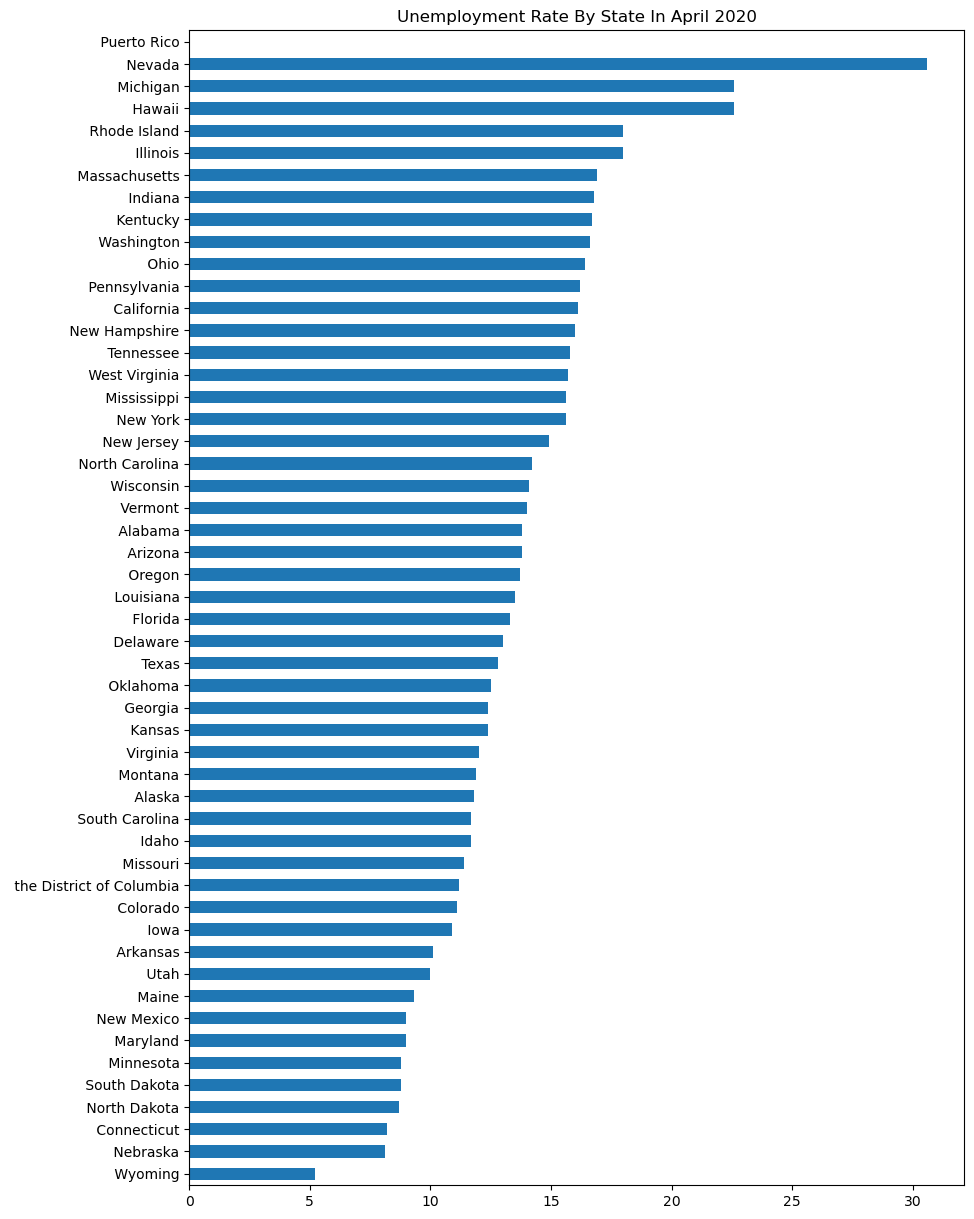

In [84]:
# Create a horizontal bar chart of unemployment rates by state for April 2020
graph = uemp_results.loc[uemp_results.index=='2020-04-01'].transpose().sort_values('2020-04-01').plot(kind="barh",
figsize=(10,15),width=.55,title="Unemployment Rate By State In April 2020")
graph.legend().remove()


# Create Subplots Using plotly.express


In [91]:
# Fill missing values in the sp500 Series using forward fill

# Create a line chart of the S&P 500 performance in April 2020
sp500_filled = sp500.fillna(method='ffill')
fig = px.line(sp500_filled.loc['2020-04'], title='S&P 500 Performance in April 2020')
fig.update_layout(showlegend=False)
fig.update_layout(width=800, height=600)
fig.show()


# Filter and sort the unemployment data for April 2020 and create a horizontal bar chart
uemp_april = uemp_results.loc[uemp_results.index=='2020-04-01'].transpose().sort_values('2020-04-01')
fig = px.bar(uemp_april, x='2020-04-01', y=uemp_april.index, title='Unemployment Rate By State In April 2020', orientation='h')
fig.update_layout(showlegend=False, height=1000)
fig.show()



In [ ]:
# After analysis it could be seen that during april 2020 when all the states had imposed lockdown. Unemployment rates were at an all time high in Nevada. The S&P 500 started off low during the month of april but had a significant increase by the end of the month and finished off at 2912. Which means there was an increase of over 17% in 1 month